<IPython.core.display.Javascript object>

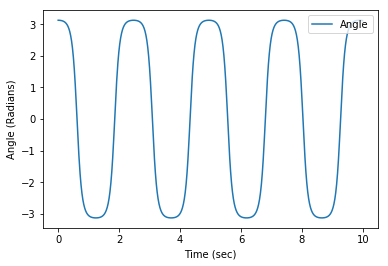

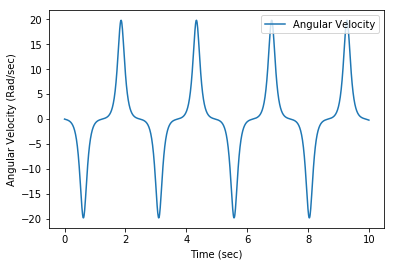

In [3]:
# Single Pendulum

import numpy as np
import pylab as plt
from math import pi
from vpython import sphere,rate,vector,canvas,scene,color,shapes,box,cylinder


g = 9.81 #m/s**2
l = .1 #10 cm
theta0 = 179*pi/180 #initial position of bob
r = np.array([theta0,0],float)
scene1 = canvas()

a = 0   #start time
b = 10  #End time
N = 1000 #number of steps
h = (b-a)/N  #width of each step

#dtheta/dt = omega .  domega/dt = -g/l * sin(theta)

def f(r,t):
    theta = r[0]
    omega = r[1]
    
    ftheta = omega
    fomega = -g/l * np.sin(theta)
    
    return np.array([ftheta,fomega])

#fourth order RK method
thetapts = []
omegapts = []
tpts = np.arange(a,b,h)
s = sphere(pos = vector(l*np.cos(theta0),l*np.sin(theta0),0),radius = .01,\
           color = color.green)
#L = shapes.line(start=s.pos, end=(0,l,0), np=20)
roof=box(pos=vector(0,l,0),size=vector(.01,0.01,.01),color=color.red)
pivot = vector(0,l,0)
arm=cylinder(pos=pivot,axis=s.pos-pivot,radius=0.001,color=color.blue)


for t in tpts:    
    thetapts.append(r[0])
    omegapts.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+.5*k1,t+.5*h)
    k3 = h*f(r+.5*k2,t+.5*h)
    k4 = h*f(r+k3,t+h)
    
    r += (k1+2*k2+2*k3+k4)/6
    rate(35)
    s.pos = vector(-l*np.sin(r[0]),l-l*np.cos(r[0]),0)
    arm.axis = s.pos-pivot
    
    
    
plt.plot(tpts,thetapts,label = "Angle")
plt.legend(loc = 1)
plt.xlabel("Time (sec)")
plt.ylabel("Angle (Radians)")
plt.show()
plt.plot(tpts,omegapts,label = "Angular Velocity")
plt.xlabel("Time (sec)")
plt.ylabel("Angular Velocity (Rad/sec)")
plt.legend(loc = 1)
plt.show()




In [ ]:
import numpy as np
import pylab as plt
from math import pi,sin,cos
from vpython import sphere,rate,vector,canvas,scene,color,shapes,box,cylinder

theta1_0 = 90*pi/180 #initial position of bob 1
theta2_0 = 90*pi/180
l_new = .4

a = 0
b = 100
N = 100000
h = (b-a)/N
g = 9.81
m = 1

def P(rp):
    
    theta1 = rp[0]  #theta 1 dot = omega1
    omega1 = rp[1]  #theta 2 dot = omega2
    theta2 = rp[2]
    omega2 = rp[3]
    
    E = m*l_new**2/2 * (2*omega1**2 + omega2**2 + 2*omega1*\
                        omega2*cos(theta1 - theta2)) - m*g*l_new*(2*cos(theta1) + cos(theta2))
    
    ftheta1 = omega1
    ftheta2 = omega2
    fomega1 = -(omega1**2*sin(2*theta1-2*theta2)+2*omega2**2*sin(theta1-theta2)\
                +(g/l_new)*(sin(theta1-2*theta2)+3*sin(theta1)))\
                /(3-cos(2*theta1 - 2*theta2))
    fomega2 = (4*omega1**2*sin(theta1-theta2) + omega2**2*sin(2*theta1-2*theta2) +\
                2*(g/l_new)*(sin(2*theta1-theta2) - sin(theta2)))\
                /(3-cos(2*theta1 - 2*theta2))
    
    return np.array([ftheta1,fomega1,ftheta2,fomega2,E]) 

#initialize r

rp = np.array([theta1_0,0,theta2_0,0,0],float)
tpoints = np.arange(a,b,h)
theta1pts = []
theta2pts = []
omega1pts = []
omega2pts = []
Epoints = []

bob1 = sphere(pos = vector(l_new*np.cos(theta1_0),l_new*np.sin(theta1_0),0)\
              ,radius = .025,color = color.green)
bob2 = sphere(pos = vector(l_new*np.cos(theta2_0),\
             l_new*(cos(theta1_0)+cos(theta2_0)),0),radius = .025,color = color.green)
roof=box(pos=vector(0,l_new,0),size=vector(.02,0.02,.02),color=color.red)
pivot = vector(0,l_new,0)
arm1=cylinder(pos=pivot,axis=bob1.pos-pivot,radius=0.0015,color=color.blue)
arm2 = cylinder(pos = bob1.pos,axis = bob2.pos - bob1.pos,radius = .001,color = color.blue)

scene = canvas(title = 'Double Pendulum')
for t in tpoints:    
    theta1pts.append(rp[0])
    omega1pts.append(rp[1])
    theta2pts.append(rp[2])
    omega2pts.append(rp[3])
    Epoints.append(rp[4])
    
    k1 = h*P(rp)
    k2 = h*P(rp+.5*k1)
    k3 = h*P(rp+.5*k2)
    k4 = h*P(rp+k3)
    
    rp += (k1+2*k2+2*k3+k4)/6

    rate(100)
    bob1.pos = vector(-l_new*np.sin(rp[0]),l_new-l_new*np.cos(rp[0]),0)
    bob2.pos = vector(-l_new*sin(rp[0])+l_new*sin(rp[1]),l_new-l_new*\
                      (cos(rp[0]) + cos(rp[1])),0)
    arm1.axis = bob1.pos-pivot
    arm2.pos = bob2.pos
    arm2.axis = -(bob2.pos - bob1.pos)
    
    
#plt.plot(tpoints,theta1pts)
#plt.show()
#plt.plot(tpoints,theta2pts)
plt.plot(tpoints,Epoints)
plt.ylabel("Energy (J)")
plt.xlabel("Time (sec)")
plt.show()

                
print("done")             

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>